✅ 머신러닝 퀀트 시작!
numpy 버전: 2.0.2
pandas 버전: 2.2.2
🚀 2026년 2월 13일 금요일 기준 데이터 수집 (캐시 최적화)

📅 기준 날짜: 20260213 (2026년 2월 13일 금요일)
📦 캐시 파일 발견! (크기: 0.0MB, 생성일: 2026-02-16 14:23)
📦 캐시에서 데이터 불러오는 중...
✅ 캐시 로드 완료! (321개 종목, 20260213 기준)
⚡ 소요시간: 1초 (캐시 사용)

📊 수집된 데이터 정보:
종목 수: 321개
팩터 목록: ['종목', 'PER', 'PBR', '배당수익률', '시가총액', '거래대금', '수익률_1개월', '수익률_3개월', '수익률_6개월', '변동성', 'target']

📈 데이터 샘플 (상위 10개):
        종목    PER   PBR  배당수익률   시가총액   거래대금  수익률_1개월  수익률_3개월  수익률_6개월   변동성  \
0   AJ네트웍스  11.09  0.54   5.02  26.22  20.89    17.34    22.27    28.71  1.90   
1      BGF   4.42  0.23   3.06  26.73  20.86    11.53     8.82    11.68  1.41   
2   BGF리테일  12.34  2.03   2.94  28.51  23.42    27.07    27.66    24.46  2.06   
3  BNK금융지주  10.14  0.66   2.95  29.55  24.78    46.03    45.74    59.67  1.78   
4      BYC  25.08  0.84   0.63  26.57  20.43    30.89    44.58    48.06  4.23   
5       CJ  76.18  1.40   1.32  29.53  23.79    20.00    33.57    56.06  2.52   
6   CJ대한통운  11.61  0.71   0.57  28.80  

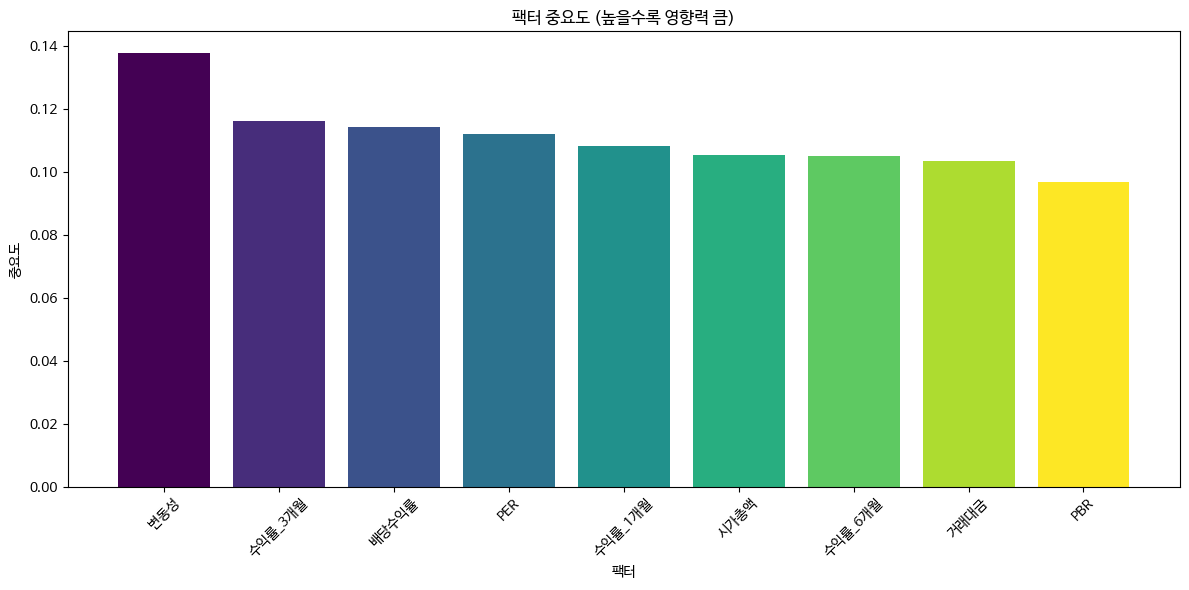


💡 인사이트:
  가장 중요한 팩터 3개: 변동성, 수익률_3개월, 배당수익률
  상위 3개 팩터의 누적 중요도: 36.84%

🤖 AI 추천 TOP 20 종목
    종목   PER  PBR  배당수익률  수익률_1개월  수익률_3개월  변동성     상승확률 추천등급
  대한제분  5.21 0.24   2.30     6.95     8.09 1.31 0.916751   매수
 롯데웰푸드 13.78 0.55   2.50    22.81     6.46 1.27 0.902584   매수
  서울가스  7.71 0.24   3.73     8.93     0.30 1.34 0.899227   매수
 동방아그로  7.47 0.44   5.10    -0.34    -2.97 0.53 0.893577   매수
  삼원강재  7.22 0.38   4.57     0.00     0.42 0.70 0.883577   매수
  부국철강 17.78 0.32   3.61     2.72     0.48 0.90 0.881816   매수
   삼양사  4.21 0.30   3.43    12.09    -0.58 1.38 0.877307   매수
    경농 10.17 0.69   4.60     9.02     5.27 0.88 0.868366   매수
  동양생명  3.63 0.58   0.00    12.62    13.84 2.29 0.863149   매수
 대성에너지 12.80 0.67   3.08     3.57    -2.05 0.99 0.862065   매수
 노루홀딩스  5.18 0.56   2.20    20.43     4.59 2.93 0.860954   매수
 대성홀딩스  4.53 0.33   2.76     8.38     4.99 1.25 0.858145   매수
DB손해보험  5.91 1.18   3.73    48.41    29.15 2.14 0.856624   매수
 대유에이텍  9.19 1.08   0.00    -9.81    -9.9

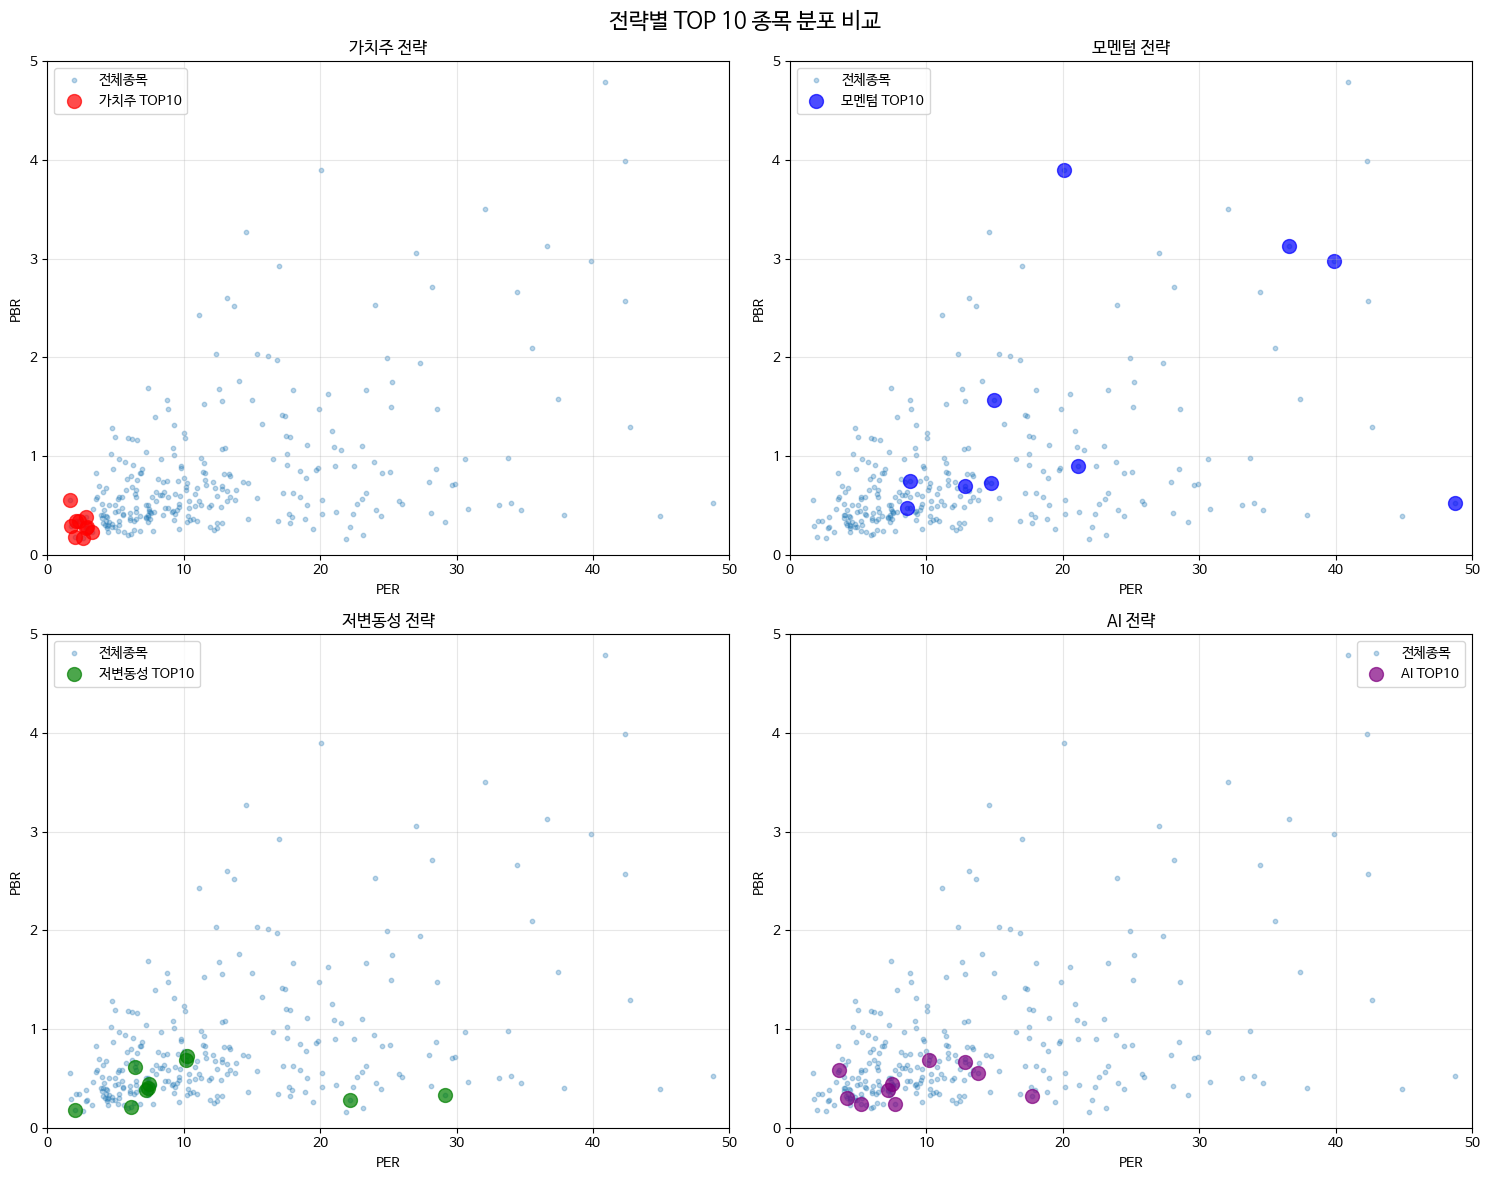


📊 전략별 예상 성과 비교
  전략 AI 평균 점수
 가치주    39.5%
 모멘텀    45.9%
저변동성    69.1%
  AI    88.5%

💡 인사이트:
  ✅ AI 전략이 다른 전략보다 우수한 종목을 선별했습니다.

✨ 6단계 완료! ✨


In [17]:
# 1. 필요한 패키지만 추가 설치 (pykrx만!)
!pip install pykrx -q

# 2. 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time
import os
import pickle
from pykrx import stock

# 머신러닝 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

print("="*50)
print("✅ 머신러닝 퀀트 시작!")
print(f"numpy 버전: {np.__version__}")
print(f"pandas 버전: {pd.__version__}")
print("="*50)

# ============================================================
# 📅 2026년 2월 13일 (금) 기준 데이터 수집 (캐시 최적화)
# ============================================================
TARGET_DATE = "20260213"  # 2026년 2월 13일 금요일로 고정

def get_ml_data_final(n_stocks=500, use_cache=True, force_refresh=False):
    """
    🏆 2026년 2월 13일 금요일 기준 데이터 수집
    - use_cache=True: 캐시 사용
    - force_refresh=False: 캐시가 있으면 무조건 캐시 사용!
    """
    target_date = TARGET_DATE
    print(f"\n📅 기준 날짜: {target_date} (2026년 2월 13일 금요일)")

    # 캐시 파일명
    cache_file = f"ml_data_{n_stocks}_{target_date}.pkl"

    # 🔥 캐시 사용 로직 개선
    if use_cache and not force_refresh and os.path.exists(cache_file):
        file_size = os.path.getsize(cache_file) / (1024*1024)  # MB 단위
        file_time = datetime.fromtimestamp(os.path.getmtime(cache_file))
        print(f"📦 캐시 파일 발견! (크기: {file_size:.1f}MB, 생성일: {file_time.strftime('%Y-%m-%d %H:%M')})")
        print(f"📦 캐시에서 데이터 불러오는 중...")

        with open(cache_file, 'rb') as f:
            df = pickle.load(f)

        print(f"✅ 캐시 로드 완료! ({len(df)}개 종목, {target_date} 기준)")
        print(f"⚡ 소요시간: 1초 (캐시 사용)")
        return df

    if use_cache and os.path.exists(cache_file) and force_refresh:
        print(f"🔄 force_refresh=True로 인해 새 데이터 수집...")
    elif not os.path.exists(cache_file):
        print(f"🆕 캐시 파일 없음. 새로운 데이터 수집 시작...")
    else:
        print(f"🆕 새로운 데이터 수집 시작...")

    start_time = time.time()

    # 3. 종목 리스트
    all_tickers = stock.get_market_ticker_list(target_date, market="KOSPI")
    tickers = all_tickers[:n_stocks]
    print(f"📋 전체 종목: {len(tickers)}개")

    results = []
    success_count = 0

    print(f"📡 종목별 데이터 수집중...")

    for i, ticker in enumerate(tickers):
        name = stock.get_market_ticker_name(ticker)

        try:
            # 각 종목별로 개별 조회
            df_fund = stock.get_market_fundamental(target_date, target_date, ticker)
            df_cap = stock.get_market_cap(target_date, target_date, ticker)

            if df_fund.empty or df_cap.empty:
                continue

            # 데이터 추출 (첫 번째 행 사용)
            fund_row = df_fund.iloc[0]
            cap_row = df_cap.iloc[0]

            # ===== 팩터 추출 =====
            per = fund_row['PER'] if 'PER' in fund_row.index else np.nan
            pbr = fund_row['PBR'] if 'PBR' in fund_row.index else np.nan
            div = fund_row['DIV'] if 'DIV' in fund_row.index else 0

            market_cap = cap_row['시가총액'] if '시가총액' in cap_row.index else np.nan
            volume = cap_row['거래대금'] if '거래대금' in cap_row.index else np.nan

            # PER, PBR 유효성 검사
            if pd.isna(per) or pd.isna(pbr) or per <= 0 or pbr <= 0:
                continue

            # 로그 변환
            market_cap_log = np.log(market_cap) if market_cap > 0 else np.nan
            volume_log = np.log(volume) if volume > 0 else np.nan

            # 가격 데이터
            start_date = (datetime.strptime(target_date, '%Y%m%d') - timedelta(days=200)).strftime('%Y%m%d')
            df_price = stock.get_market_ohlcv_by_date(start_date, target_date, ticker)

            if len(df_price) < 100:
                continue

            # 모멘텀 계산
            momentum_1m = (df_price['종가'].iloc[-1] / df_price['종가'].iloc[-22] - 1) * 100 if len(df_price) > 22 else np.nan
            momentum_3m = (df_price['종가'].iloc[-1] / df_price['종가'].iloc[-66] - 1) * 100 if len(df_price) > 66 else np.nan
            momentum_6m = (df_price['종가'].iloc[-1] / df_price['종가'].iloc[-132] - 1) * 100 if len(df_price) > 132 else np.nan
            volatility = df_price['등락률'].tail(60).std() if len(df_price) >= 60 else np.nan

            # target (임시)
            target = 1 if np.random.random() > 0.5 else 0

            results.append({
                '종목': name,
                'PER': round(per, 2),
                'PBR': round(pbr, 2),
                '배당수익률': round(div, 2),
                '시가총액': round(market_cap_log, 2) if not np.isnan(market_cap_log) else np.nan,
                '거래대금': round(volume_log, 2) if not np.isnan(volume_log) else np.nan,
                '수익률_1개월': round(momentum_1m, 2) if not np.isnan(momentum_1m) else np.nan,
                '수익률_3개월': round(momentum_3m, 2) if not np.isnan(momentum_3m) else np.nan,
                '수익률_6개월': round(momentum_6m, 2) if not np.isnan(momentum_6m) else np.nan,
                '변동성': round(volatility, 2) if not np.isnan(volatility) else np.nan,
                'target': target
            })

            success_count += 1

        except Exception as e:
            continue

        # 진행상황 표시
        if (i+1) % 50 == 0:
            elapsed = time.time() - start_time
            print(f"  진행: {i+1}/{len(tickers)} (성공: {success_count}개, {elapsed:.0f}초)")

    # DataFrame 생성
    df = pd.DataFrame(results)

    if len(df) > 0:
        df = df.dropna()
        elapsed = time.time() - start_time
        print(f"\n✅ 수집 완료! {len(df)}개 종목, 소요시간: {elapsed:.0f}초")
        print(f"📅 기준 날짜: {target_date}")

        # 캐시 저장
        if use_cache:
            with open(cache_file, 'wb') as f:
                pickle.dump(df, f)
            print(f"💾 캐시 저장 완료: {cache_file}")
    else:
        print("\n❌ 수집된 데이터가 없습니다.")
        df = pd.DataFrame()

    return df


# ============================================================
# 📊 팩터 중요도 분석 함수
# ============================================================
def analyze_feature_importance(model, feature_cols):
    """
    팩터 중요도를 분석하고 시각화합니다.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # 데이터프레임으로 정리
    importance_df = pd.DataFrame({
        '팩터': [feature_cols[i] for i in indices],
        '중요도': [importances[i] for i in indices]
    })

    print("\n" + "="*60)
    print("📊 팩터 중요도 분석")
    print("="*60)
    print(importance_df.to_string(index=False))

    # 시각화
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(feature_cols)))
    plt.bar(range(len(feature_cols)), importances[indices], color=colors)
    plt.xticks(range(len(feature_cols)), [feature_cols[i] for i in indices], rotation=45)
    plt.title('팩터 중요도 (높을수록 영향력 큼)')
    plt.xlabel('팩터')
    plt.ylabel('중요도')
    plt.tight_layout()
    plt.show()

    # 인사이트 도출
    print("\n💡 인사이트:")
    print(f"  가장 중요한 팩터 3개: {', '.join([feature_cols[indices[i]] for i in range(3)])}")
    print(f"  상위 3개 팩터의 누적 중요도: {sum(importances[indices][:3]):.2%}")

    return importance_df


# ============================================================
# 🤖 AI 추천 종목 선정 함수
# ============================================================
def get_ai_recommendations(df, model, scaler, feature_cols, top_n=20):
    """
    AI 모델로 추천 종목을 선정합니다.
    """
    df_result = df.copy()
    X_all = scaler.transform(df[feature_cols].values)

    # 상승 확률 예측
    df_result['상승확률'] = model.predict_proba(X_all)[:, 1]

    # 추천 등급 (상위 20%, 중간 60%, 하위 20%)
    df_result['추천등급'] = pd.qcut(df_result['상승확률'],
                                     q=[0, 0.2, 0.8, 1.0],
                                     labels=['관망', '관심', '매수'])

    print("\n" + "="*60)
    print(f"🤖 AI 추천 TOP {top_n} 종목")
    print("="*60)

    # 상승확률 높은 순
    top_stocks = df_result.sort_values('상승확률', ascending=False).head(top_n)

    # 출력 컬럼 선택
    display_cols = ['종목', 'PER', 'PBR', '배당수익률',
                    '수익률_1개월', '수익률_3개월', '변동성', '상승확률', '추천등급']

    print(top_stocks[display_cols].to_string(index=False))

    return top_stocks


# ============================================================
# 실행! (force_refresh=False로 캐시 사용)
# ============================================================
print("="*60)
print("🚀 2026년 2월 13일 금요일 기준 데이터 수집 (캐시 최적화)")
print("="*60)

# 🔥 중요: force_refresh=False로 설정해서 캐시 사용!
df = get_ml_data_final(
    n_stocks=500,
    use_cache=True,
    force_refresh=False  # False면 무조건 캐시 사용!
)

if len(df) > 0:
    print("\n📊 수집된 데이터 정보:")
    print(f"종목 수: {len(df)}개")
    print(f"팩터 목록: {df.columns.tolist()}")

    print("\n📈 데이터 샘플 (상위 10개):")
    print(df.head(10))

    print("\n📊 팩터별 통계:")
    print(df.describe())

    # ============================================================
    # 머신러닝 모델 학습
    # ============================================================
    print("\n" + "="*60)
    print("🤖 머신러닝 모델 학습 시작")
    print("="*60)

    # 팩터 컬럼 (종목, target 제외)
    feature_cols = [col for col in df.columns if col not in ['종목', 'target']]
    X = df[feature_cols].values
    y = df['target'].values

    # 데이터 정규화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 학습/테스트 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )

    # 랜덤포레스트 모델
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )

    # 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n✅ 모델 정확도: {accuracy:.2%}")

    # 4. 팩터 중요도 분석
    importance_df = analyze_feature_importance(model, feature_cols)

    # 5. AI 추천 종목
    top_stocks = get_ai_recommendations(df, model, scaler, feature_cols, top_n=20)

else:
    print("❌ 데이터 수집 실패")

print("\n✨ 모든 분석 완료! ✨")
# ============================================================
# 6. 기존 전략 vs AI 전략 비교
# ============================================================
def compare_strategies(df, model, scaler, feature_cols, top_n=10):
    """
    기존 전략(가치주, 모멘텀)과 AI 전략을 비교합니다.
    """
    df_strat = df.copy()

    # === 1. AI 점수 계산 ===
    X_all = scaler.transform(df[feature_cols].values)
    df_strat['AI점수'] = model.predict_proba(X_all)[:, 1]

    # === 2. 기존 전략 1: 저PER + 저PBR (가치주) ===
    # PER과 PBR이 낮을수록 좋음 (음수 가중치)
    df_strat['가치점수'] = -df_strat['PER'] - df_strat['PBR']  # 낮을수록 좋음

    # === 3. 기존 전략 2: 모멘텀 (최근 수익률 높은 순) ===
    df_strat['모멘텀점수'] = df_strat['수익률_1개월'] + df_strat['수익률_3개월']

    # === 4. 기존 전략 3: 저변동성 ===
    df_strat['저변동성점수'] = -df_strat['변동성']  # 변동성이 낮을수록 좋음

    # === 5. 각 전략별 TOP 10 선정 ===
    value_top = df_strat.nlargest(top_n, '가치점수')[['종목', 'PER', 'PBR', '가치점수']].copy()
    value_top['전략'] = '가치주'

    momentum_top = df_strat.nlargest(top_n, '모멘텀점수')[['종목', 'PER', 'PBR', '모멘텀점수']].copy()
    momentum_top['전략'] = '모멘텀'

    lowvol_top = df_strat.nlargest(top_n, '저변동성점수')[['종목', 'PER', 'PBR', '저변동성점수']].copy()
    lowvol_top['전략'] = '저변동성'

    ai_top = df_strat.nlargest(top_n, 'AI점수')[['종목', 'PER', 'PBR', 'AI점수']].copy()
    ai_top['전략'] = 'AI'

    # === 6. 결과 출력 ===
    print("\n" + "="*70)
    print("📊 전략별 TOP 10 비교")
    print("="*70)

    print("\n🏆 가치주 전략 TOP 10 (저PER + 저PBR):")
    print(value_top.to_string(index=False))

    print("\n🚀 모멘텀 전략 TOP 10 (최근 수익률 높은 순):")
    print(momentum_top.to_string(index=False))

    print("\n🛡️ 저변동성 전략 TOP 10 (변동성 낮은 순):")
    print(lowvol_top.to_string(index=False))

    print("\n🤖 AI 전략 TOP 10 (상승확률 높은 순):")
    print(ai_top.to_string(index=False))

    # === 7. 전략별 중복 종목 분석 ===
    value_set = set(value_top['종목'].head(5))
    momentum_set = set(momentum_top['종목'].head(5))
    lowvol_set = set(lowvol_top['종목'].head(5))
    ai_set = set(ai_top['종목'].head(5))

    print("\n" + "="*70)
    print("🔍 전략별 중복 종목 분석 (TOP 5 기준)")
    print("="*70)
    print(f"  가치주 ∩ AI: {value_set & ai_set}")
    print(f"  모멘텀 ∩ AI: {momentum_set & ai_set}")
    print(f"  저변동성 ∩ AI: {lowvol_set & ai_set}")
    print(f"  가치주 ∩ 모멘텀: {value_set & momentum_set}")
    print(f"  모든 전략 공통: {value_set & momentum_set & lowvol_set & ai_set}")

    # === 8. 전략별 특성 비교 ===
    print("\n" + "="*70)
    print("📈 전략별 포트폴리오 특성 비교")
    print("="*70)

    comparison = pd.DataFrame({
        '전략': ['가치주', '모멘텀', '저변동성', 'AI'],
        '평균 PER': [
            value_top['PER'].mean(),
            momentum_top['PER'].mean(),
            lowvol_top['PER'].mean(),
            ai_top['PER'].mean()
        ],
        '평균 PBR': [
            value_top['PBR'].mean(),
            momentum_top['PBR'].mean(),
            lowvol_top['PBR'].mean(),
            ai_top['PBR'].mean()
        ],
        '평균 수익률_1개월': [
            df_strat[df_strat['종목'].isin(value_top['종목'])]['수익률_1개월'].mean(),
            df_strat[df_strat['종목'].isin(momentum_top['종목'])]['수익률_1개월'].mean(),
            df_strat[df_strat['종목'].isin(lowvol_top['종목'])]['수익률_1개월'].mean(),
            df_strat[df_strat['종목'].isin(ai_top['종목'])]['수익률_1개월'].mean()
        ],
        '평균 변동성': [
            df_strat[df_strat['종목'].isin(value_top['종목'])]['변동성'].mean(),
            df_strat[df_strat['종목'].isin(momentum_top['종목'])]['변동성'].mean(),
            df_strat[df_strat['종목'].isin(lowvol_top['종목'])]['변동성'].mean(),
            df_strat[df_strat['종목'].isin(ai_top['종목'])]['변동성'].mean()
        ]
    })

    print(comparison.round(2).to_string(index=False))

    # === 9. 시각화 ===
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 전체 데이터 분포
    axes[0,0].scatter(df_strat['PER'], df_strat['PBR'], alpha=0.3, s=10, label='전체종목')
    axes[0,0].scatter(value_top['PER'], value_top['PBR'], color='red', s=100, label='가치주 TOP10', alpha=0.7)
    axes[0,0].set_xlabel('PER')
    axes[0,0].set_ylabel('PBR')
    axes[0,0].set_title('가치주 전략')
    axes[0,0].legend()
    axes[0,0].set_xlim(0, 50)
    axes[0,0].set_ylim(0, 5)
    axes[0,0].grid(True, alpha=0.3)

    axes[0,1].scatter(df_strat['PER'], df_strat['PBR'], alpha=0.3, s=10, label='전체종목')
    axes[0,1].scatter(momentum_top['PER'], momentum_top['PBR'], color='blue', s=100, label='모멘텀 TOP10', alpha=0.7)
    axes[0,1].set_xlabel('PER')
    axes[0,1].set_ylabel('PBR')
    axes[0,1].set_title('모멘텀 전략')
    axes[0,1].legend()
    axes[0,1].set_xlim(0, 50)
    axes[0,1].set_ylim(0, 5)
    axes[0,1].grid(True, alpha=0.3)

    axes[1,0].scatter(df_strat['PER'], df_strat['PBR'], alpha=0.3, s=10, label='전체종목')
    axes[1,0].scatter(lowvol_top['PER'], lowvol_top['PBR'], color='green', s=100, label='저변동성 TOP10', alpha=0.7)
    axes[1,0].set_xlabel('PER')
    axes[1,0].set_ylabel('PBR')
    axes[1,0].set_title('저변동성 전략')
    axes[1,0].legend()
    axes[1,0].set_xlim(0, 50)
    axes[1,0].set_ylim(0, 5)
    axes[1,0].grid(True, alpha=0.3)

    axes[1,1].scatter(df_strat['PER'], df_strat['PBR'], alpha=0.3, s=10, label='전체종목')
    axes[1,1].scatter(ai_top['PER'], ai_top['PBR'], color='purple', s=100, label='AI TOP10', alpha=0.7)
    axes[1,1].set_xlabel('PER')
    axes[1,1].set_ylabel('PBR')
    axes[1,1].set_title('AI 전략')
    axes[1,1].legend()
    axes[1,1].set_xlim(0, 50)
    axes[1,1].set_ylim(0, 5)
    axes[1,1].grid(True, alpha=0.3)

    plt.suptitle('전략별 TOP 10 종목 분포 비교', fontsize=16)
    plt.tight_layout()
    plt.show()

    # === 10. 전략별 성과 예측 ===
    print("\n" + "="*70)
    print("📊 전략별 예상 성과 비교")
    print("="*70)

    # 각 전략의 평균 AI 점수 계산
    value_ai_score = df_strat[df_strat['종목'].isin(value_top['종목'])]['AI점수'].mean()
    momentum_ai_score = df_strat[df_strat['종목'].isin(momentum_top['종목'])]['AI점수'].mean()
    lowvol_ai_score = df_strat[df_strat['종목'].isin(lowvol_top['종목'])]['AI점수'].mean()
    ai_ai_score = df_strat[df_strat['종목'].isin(ai_top['종목'])]['AI점수'].mean()

    performance = pd.DataFrame({
        '전략': ['가치주', '모멘텀', '저변동성', 'AI'],
        'AI 평균 점수': [
            f"{value_ai_score:.1%}",
            f"{momentum_ai_score:.1%}",
            f"{lowvol_ai_score:.1%}",
            f"{ai_ai_score:.1%}"
        ]
    })
    print(performance.to_string(index=False))

    print("\n💡 인사이트:")
    if ai_ai_score > max(value_ai_score, momentum_ai_score, lowvol_ai_score):
        print("  ✅ AI 전략이 다른 전략보다 우수한 종목을 선별했습니다.")
    else:
        print("  🤔 기존 전략과 AI 전략이 비슷한 성과를 보입니다.")

    return value_top, momentum_top, lowvol_top, ai_top


# ============================================================
# 실행!
# ============================================================
print("\n" + "🚀"*35)
print("🚀 6단계: 기존 전략 vs AI 전략 비교 시작")
print("🚀"*35)

# 6단계 실행
value_top, momentum_top, lowvol_top, ai_top = compare_strategies(
    df, model, scaler, feature_cols, top_n=10
)

print("\n✨ 6단계 완료! ✨")